In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP

In [2]:
def load_results_dataframe(language: str) -> pd.DataFrame:
    df = pd.read_csv(f'https://scandeval.com/{language}-nlu.csv')
    df['generative'] = df.model_id.map(lambda x: "few-shot" in x)
    df.set_index('model_id', inplace=True)
    df.drop(
        columns=[
            "num_model_parameters", 
            "vocabulary_size", 
            "max_sequence_length", 
            "speed",
        ] + [col for col in df.columns if "rank" in col], 
        inplace=True,
    )
    return df

In [10]:
df = load_results_dataframe(language="mainland-scandinavian")
df.head()

,dansk,angry_tweets,scala_da,scandiqa_da,norne_nb,norne_nn,norec,scala_nb,scala_nn,norquad,suc3,swerec,scala_sv,scandiqa_sv,generative
model_id,,,,,,,,,,,,,,,
"gpt-4-0613 (few-shot, val)",64.94,59.97,71.56,49.82,81.16,75.75,72.72,77.30,57.18,49.93,76.86,79.19,80.93,56.50,True
AI-Sweden-Models/roberta-large-1160k,74.16,51.20,73.87,49.34,92.01,87.17,60.11,72.85,65.56,60.38,82.65,77.25,77.90,49.64,False
ltg/norbert3-large,73.62,48.29,71.55,48.59,93.12,89.39,64.62,77.97,76.30,66.03,79.01,75.32,69.11,48.88,False
AI-Sweden-Models/roberta-large-1350k,75.22,49.94,72.59,48.97,92.49,87.22,58.77,76.30,64.11,60.69,82.97,77.37,73.81,49.50,False
danish-foundation-models/encoder-large-v1,74.60,51.42,76.11,47.42,88.66,84.59,55.59,71.43,53.30,57.38,74.18,75.11,64.11,46.79,False


<Axes: >

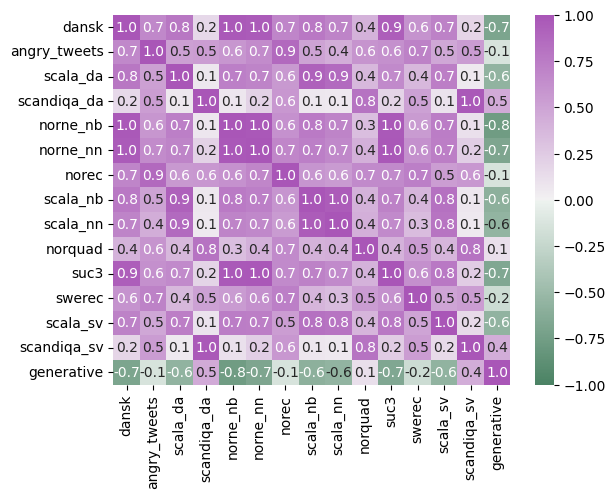

In [11]:
sns.heatmap(
    df.corr(), 
    annot=True, 
    fmt=".1f", 
    vmin=-1, 
    vmax=1, 
    cmap=sns.diverging_palette(145, 300, s=60, as_cmap=True),
)

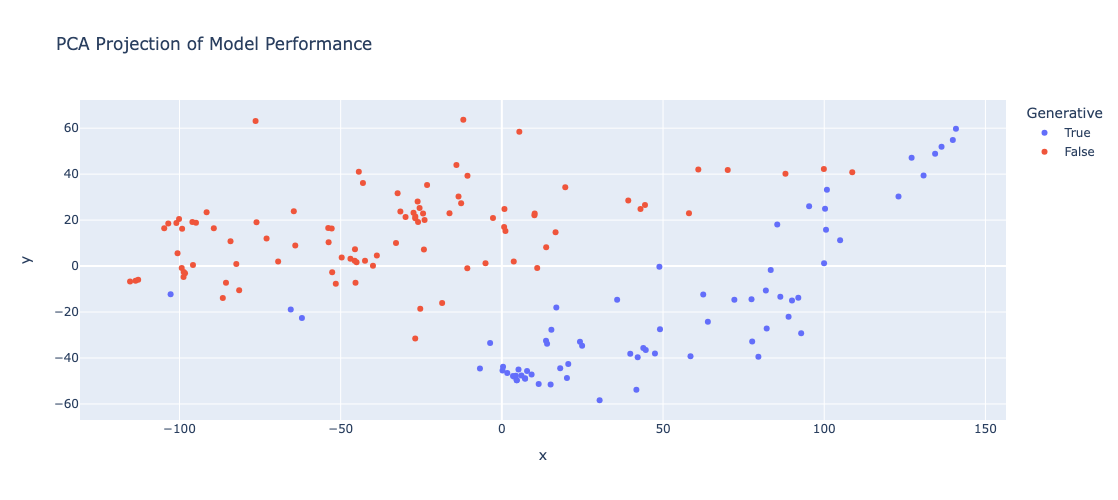

In [12]:
pca = PCA(n_components=2)
pca_projection = pca.fit_transform(df.drop(columns="generative"))
px.scatter(
    x=pca_projection[:, 0], 
    y=pca_projection[:, 1], 
    color=df.generative,
    hover_name=df.index.tolist(),
    width=650,
    height=500,
    title="PCA Projection of Model Performance",
    labels=dict(color="Generative"),
)

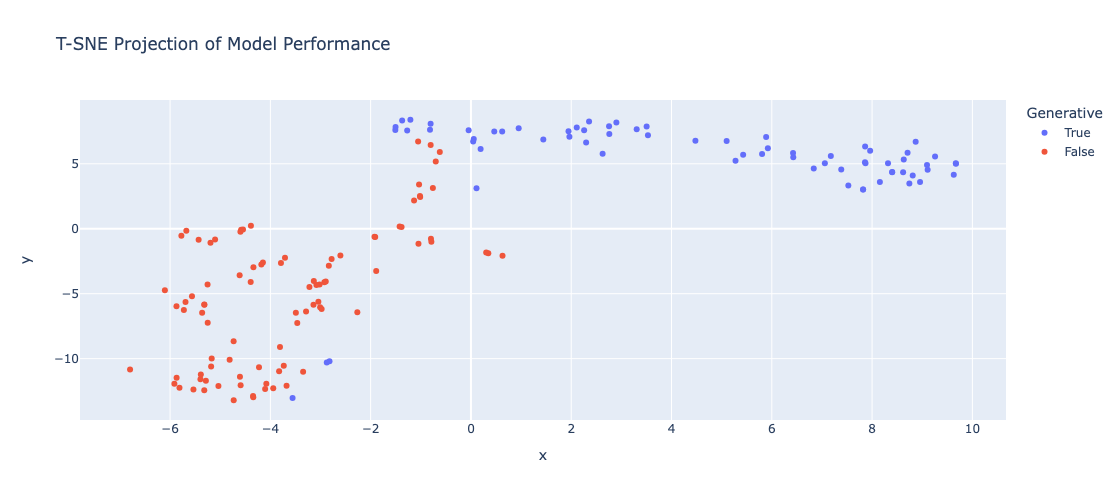

In [13]:
tsne = TSNE(n_components=2)
tsne_projection = tsne.fit_transform(df.drop(columns="generative"))
px.scatter(
    x=tsne_projection[:, 0], 
    y=tsne_projection[:, 1], 
    color=df.generative,
    hover_name=df.index.tolist(),
    width=650,
    height=500,
    title="T-SNE Projection of Model Performance",
    labels=dict(color="Generative"),
)